#### importing libraries

In [167]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing, model_selection

#### importing and reading the data frame

In [200]:
df = pd.read_csv("Titanic-Dataset.csv")

In [201]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Understanding the Data Frame

In [202]:
# Shape & Basic Information 
print(df.shape)
print(df.dtypes)
# basic summary stats
df.describe()

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [203]:
# categorical
print(df['Survived'].value_counts())

df['Cabin'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64


Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [204]:
# dropping duplicates
df = df.drop_duplicates()

# Data Cleaning

In [205]:
# Identifing Missing values

In [206]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [207]:
# handeling missing values

# imputing (mean, median)

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode())
df['Cabin']

# dropping

# how = all (drop rows where all column vals are missing)
# how = any (drop rows where any of the col vals are missing)
# subset = [list of columns]
#df = df.dropna()

0      B96 B98
1          C85
2           G6
3         C123
4          NaN
        ...   
886        NaN
887        B42
888        NaN
889       C148
890        NaN
Name: Cabin, Length: 891, dtype: object

In [238]:
## Data reduction

# drop irrelevant columns
df.drop(['Ticket','PassengerId', 'Cabin','Embarked', 'Name'], axis=1).head()

,Survived,Age,SibSp,Parch,Fare,first_name,fare_log,Pclass_2,Pclass_3,Sex_male
0,0,-0.592481,1,0,7.2500,Braund,-0.879741,0.0,1.0,1.0
1,1,0.638789,1,0,71.2833,Cumings,1.361220,0.0,0.0,0.0
2,1,-0.284663,0,0,7.9250,Heikkinen,-0.798540,0.0,1.0,0.0
3,1,0.407926,1,0,53.1000,Futrelle,1.062038,0.0,0.0,0.0
4,0,0.407926,0,0,8.0500,Allen,-0.784179,0.0,1.0,1.0


In [209]:
# based on some condition
df.loc[df['Fare']> 20 , df.columns[:7]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1
...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.000000,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1


In [210]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [211]:
# making the last name in a diff col
df['first_name'] = df['Name'].apply(lambda x: x.split(',')[0])
print(df['first_name'])

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: first_name, Length: 891, dtype: object


In [212]:
## creating a new feature
# group aggregation (creating a new column with avg fare)

df.join(df.groupby('Sex')['Fare'].mean().rename('avg_fare'), on= 'Sex').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_name,avg_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Braund,25.523893
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,44.479818
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,Heikkinen,44.479818
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,44.479818
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,25.523893


In [213]:
## more data cleaning 

# Example: Standardizing text data
df['Name'].str.lower().str.strip()

# .strip() removes empty spaces before and after.


0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [214]:
# converting int to category
df['Pclass'] = df['Pclass'].astype('category')

In [215]:

data['Date'] = pd.to_datetime(data['Date'])


data['Column'] = data['Column'].fillna(method='ffill')  # Forward fill


# data.rename(columns={'old_name': 'new_name'}, inplace=True) # renaming
#data = data[['column1', 'column2', 'new_name']]              # Reordering 

NameError: name 'data' is not defined

# EDA

In [216]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings


<Axes: xlabel='Age', ylabel='Count'>

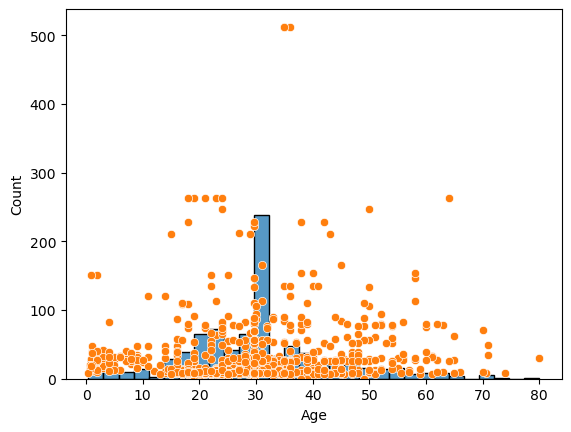

In [217]:
# basic data viz

sns.histplot(df['Age'])
sns.scatterplot(x='Age', y = 'Fare', data= df)

In [218]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
first_name       object
dtype: object

In [219]:
df[[col for col in df.columns if df[col].dtypes in ['int','float64']]].corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.069809,-0.035322,0.081629,0.257307
Age,0.033207,-0.069809,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.091566,0.159651,0.216225,1.000000


<Axes: >

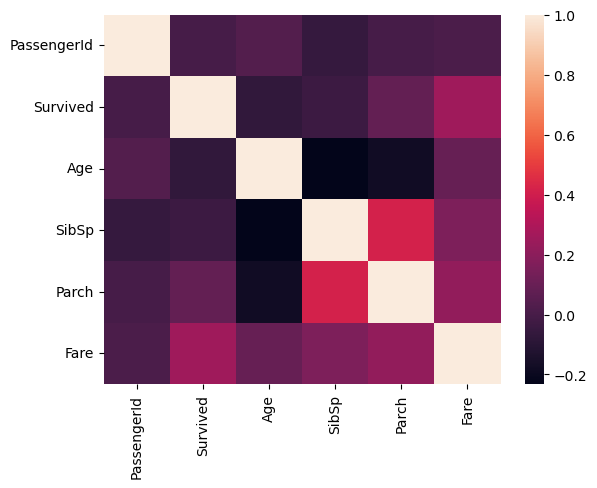

In [220]:
sns.heatmap(df[[col for col in df.columns if df[col].dtypes in ['int','float64']]].corr())

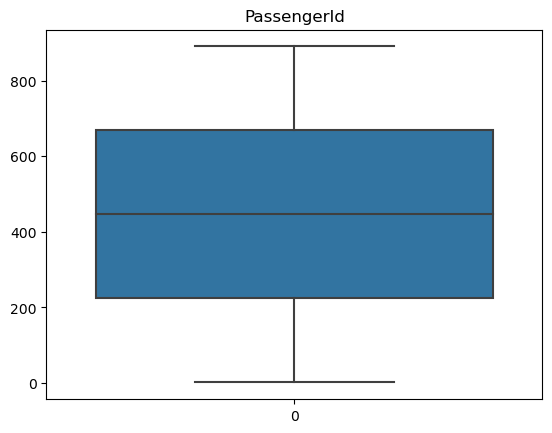

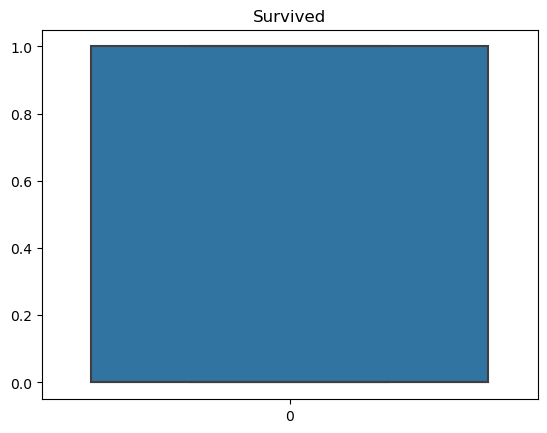

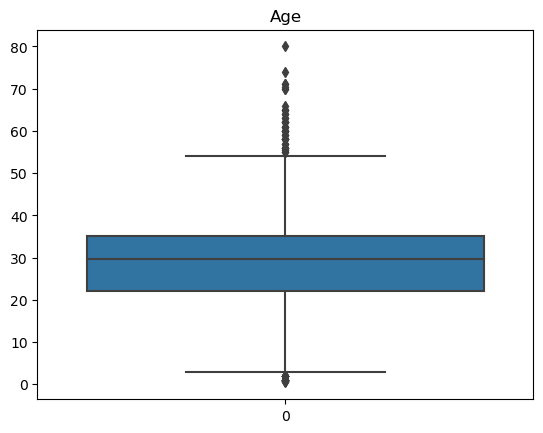

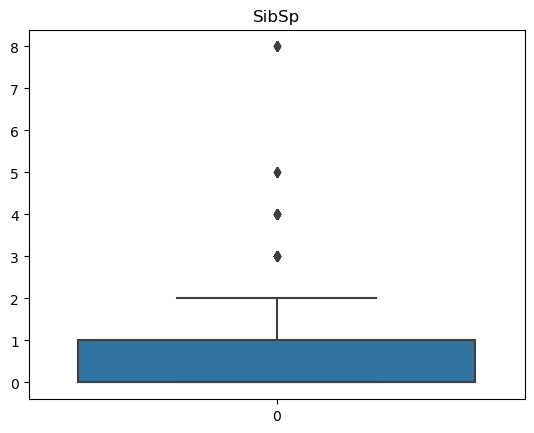

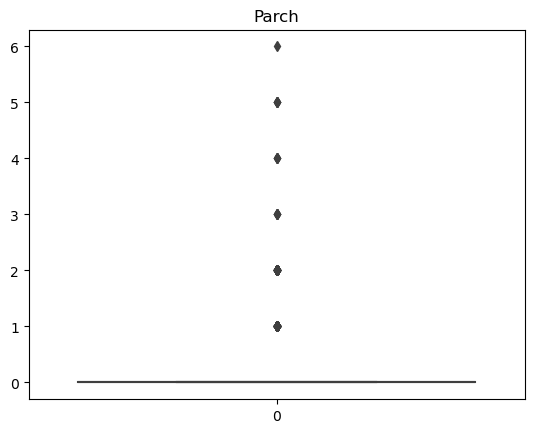

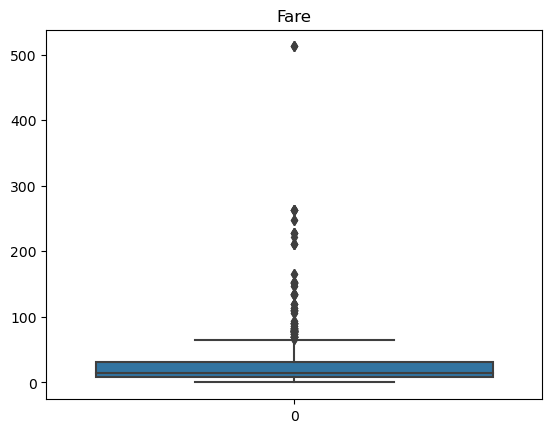

In [221]:
## boxplot for all continuous plots

for col in df.columns:
    if df[col].dtypes in ['int', 'float64']:
        plt.figure()
        sns.boxplot(df[col])
        plt.title(f'{col}')

#### Distribution of Variables and Correlations

<Axes: xlabel='Age', ylabel='Count'>

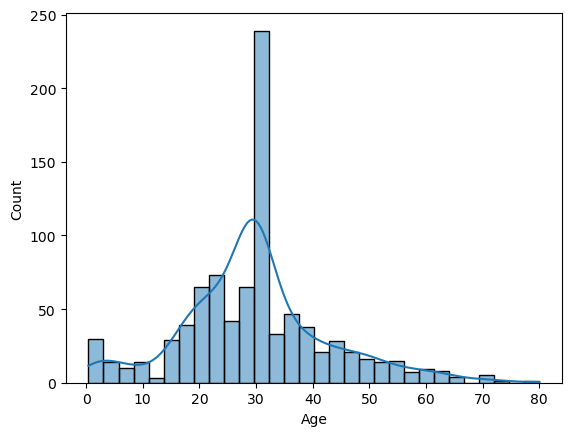

In [222]:
# exploring continous (distribution, skewness, ) and categorical (bar plot)

sns.histplot(df['Age'], kde=True)

# variables relation with target (t-test, chi-square test, correlation)
# VIF (multicollinearity)

In [223]:
print(df['Fare'].skew())
print(df['Fare'].kurtosis())

4.787316519674893
33.39814088089868


#### Feature Engineering & Data Transformation

In [224]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,B96 B98,S,Braund


In [225]:
# log transformation, polynomial features
df['fare_log'] = np.log(df['Fare']+1)


In [226]:
# categorical - one hot encoding, target encoding
df = pd.get_dummies(df, columns=['Pclass', 'Sex'], drop_first=True, dtype='float')

In [227]:
df.head(3)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_name,fare_log,Pclass_2,Pclass_3,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,S,Braund,2.110213,0.0,1.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Cumings,4.280593,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,G6,S,Heikkinen,2.188856,0.0,1.0,0.0


In [234]:
# scaling (standardization (z-score, min max)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'fare_log']] = scaler.fit_transform(df[['Age', 'fare_log']])

In [235]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_name,fare_log,Pclass_2,Pclass_3,Sex_male
0,1,0,"Braund, Mr. Owen Harris",-0.592481,1,0,A/5 21171,7.2500,B96 B98,S,Braund,-0.879741,0.0,1.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,1,0,PC 17599,71.2833,C85,C,Cumings,1.361220,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",-0.284663,0,0,STON/O2. 3101282,7.9250,G6,S,Heikkinen,-0.798540,0.0,1.0,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,1,0,113803,53.1000,C123,S,Futrelle,1.062038,0.0,0.0,0.0
4,5,0,"Allen, Mr. William Henry",0.407926,0,0,373450,8.0500,NaN,S,Allen,-0.784179,0.0,1.0,1.0


In [ ]:
# dim-reduction (PCA - pca needs normalized data)

In [ ]:
# date time, textual data (tf-idf, word embedding)

In [239]:
# prepare the final data
df = df.drop(['Ticket','PassengerId', 'Cabin','Embarked', 'Name','first_name'], axis=1)

In [242]:
df.head()

,Survived,Age,SibSp,Parch,Fare,fare_log,Pclass_2,Pclass_3,Sex_male
0,0,-0.592481,1,0,7.2500,-0.879741,0.0,1.0,1.0
1,1,0.638789,1,0,71.2833,1.361220,0.0,0.0,0.0
2,1,-0.284663,0,0,7.9250,-0.798540,0.0,1.0,0.0
3,1,0.407926,1,0,53.1000,1.062038,0.0,0.0,0.0
4,0,0.407926,0,0,8.0500,-0.784179,0.0,1.0,1.0


#### Model Selection, Model Training & Hyperparameter optimization

In [ ]:
# import model, train,test split, k-fold cross validation, 
# hyper parameter tuning - grid search, random search cv

In [248]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [246]:
X = df.drop('Fare', axis=1)
y = df['Fare']

In [247]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [256]:
## straightforward code for training a linear regression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f'mse :{mse}')
print(f'rmse :{rmse}')
print(f'mae :{mae}')
print(f'r2_score :{r2}')
print(f'model coeff:{model.coef_}')

mse :434.0019645755636
rmse :20.832713807268693
mae :12.577498742019195
r2_score :0.7309393998791065
model coeff:[ -1.18681931  -1.98991506  -4.84948482  -0.81409815  40.51086112
 -14.00710048  -5.25371432   1.20547815]


In [273]:
model = Ridge()
param_grid = {'alpha' : [0.01,0.1,10,40]} # Lower values = weaker regularization 
cv= KFold(n_splits=5, shuffle=True) # randomly shuffles so that each split is representative

grid_search_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv ,scoring='neg_mean_squared_error')
grid_search_model.fit(X_train, y_train)
y_pred = grid_search_model.predict(X_test)


mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)


print(f'mse :{mse}')
print(f'rmse :{rmse}')
print(f'mae :{mae}')
print(f'r2_score :{r2}')

mse :431.2287923790062
rmse :20.766049031508285
mae :12.46907401950322
r2_score :0.7326586348972568


In [275]:
best_model = grid_search_model.best_estimator_
best_model.coef_

array([ -0.63873763,  -1.71835417,  -4.57198354,  -0.6436046 ,
        39.83321299, -12.7172722 ,  -4.86225412,   1.14194029])

#### Model Evaluation

In [ ]:
# classification - precision, recall, accuracy, f-1 score
## regression - MAE, MSE, R-squared, Adjusted R-squared

#### Feature importance and model interpretation

In [ ]:
# SHAP- more interpretable feature importance 
# PDP - partial dependency plot
# LIME